In [20]:
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
from typing import List
import seaborn as sbn
from IPython.display import Markdown
sbn.set()

In [24]:
# MATPLOTLIB CONFIG
plt.rcParams['axes.facecolor'] = 'white'

In [3]:
PROJECT_MAIN_PATH = pathlib.Path().absolute().parent
CODE_MAIN_PATH = PROJECT_MAIN_PATH / 'src'
DATA_MAIN_PATH = CODE_MAIN_PATH / 'data_gather'
CHARTS_MAIN_PATH = PROJECT_MAIN_PATH / 'charts/PT'

EVENCHECK_GATE_PT_PATH = DATA_MAIN_PATH / 'pt/EVENCHECKgate'

# Metrics

In [4]:
def correct_rate(df: pd.DataFrame, column='potential') -> float:
    return round(df[df[column]==0.0][column].count()/df[column].count() *100, 2)

In [5]:
def mean_number_of_steps(df: pd.DataFrame, calc_column='iteration', filter_column='potential') -> float:
    return round(df[df[filter_column]==0.0][calc_column].mean(), 2)

In [6]:
def calc_mns_series(df: pd.DataFrame, groupby: str) -> pd.DataFrame:
    indices = df[groupby].unique()
    results = {groupby: [], 'mns': []}
    for ind in indices:
        results[groupby].append(ind)
        results['mns'].append(mean_number_of_steps(df[df[groupby]==ind]))
    return pd.DataFrame(results, index=results[groupby])

In [7]:
def calc_cr_series(df: pd.DataFrame, groupby: str) -> pd.DataFrame:
    indices = df[groupby].unique()
    results = {groupby: [], 'cr': []}
    for ind in indices:
        results[groupby].append(ind)
        results['cr'].append(correct_rate(df[df[groupby]==ind]))
    return pd.DataFrame(results, index=results[groupby])

# Data loading

In [16]:
df_evencheck_pt_diff_switch_step = pd.read_csv(EVENCHECK_GATE_PT_PATH / 'pt_example_numsim30_switch_steps1_50_steps5000_pt_const_sa_const.csv')
df_evencheck_pt_example = pd.read_csv(EVENCHECK_GATE_PT_PATH / 'pt_example_numsim300_switch_step10_steps5000_pt_const_saconst.csv')
df_evencheck_pt_optimal_temp_calc_1 = pd.read_csv(EVENCHECK_GATE_PT_PATH / 'pt_evencheck_numsim300_switch_step10_steps5000_ptscheme_gaussian1_sa_const_optimal_temp_calculation.csv')

# Analysis

## Parallel Tempering example

In [9]:
def plot_hist_line(data: pd.DataFrame, 
                   column: str, 
                   schemes: List[str], 
                   save_path: pathlib.Path, 
                   title: str, 
                   ylabel='y', 
                   xlabel='x',
                   xscale=None,
                   yscale=None,
                   xlim=(0,4900)
                  ) -> None:
    """
    Function plots histograms as lines
    
    param data: list of pandas DataFrame's
    type data: list
    """
    
#     num_sim = len(data[data.sa_type==schemes[0]][column])
    
#     data_copy = [data[data.sa_type==scheme][data.potential==0.][column] for scheme in schemes]
    
#     bin_values, bin_edges, bin_centers = plot_hist(data_copy, ylabel=ylabel, xlabel=xlabel)
    
#     bin_values = np.array(bin_values) * 100 / num_sim
    
#     for num_set in range(len(data_copy)):
#         if len(data_copy)==1:
#             plt.plot(bin_centers, bin_values)
#         else:
#             plt.plot(bin_centers, bin_values[num_set])

    # data_copy = [data[data.sa_type==scheme][data.potential==0.][column] for scheme in schemes]
    
    fig, ax = plt.subplots(figsize=(7,4))
    sbn.kdeplot(data[column], ax=ax, cumulative=True, bw=10)
        
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if xscale:
        plt.xscale(xscale)
    if yscale:
        plt.yscale(yscale)
    plt.title(title)
    plt.legend(schemes)
    plt.grid(color='lightgray', linestyle='--', linewidth=1)
    plt.xlim(xlim)
    plt.savefig(save_path / f'{title}.pdf', dpi=300, format='pdf')
    plt.show()

In [10]:
def plot_bar(data: pd.DataFrame, 
                   column: str, 
                   groupby: str,
                   schemes: List[str], 
                   save_path: pathlib.Path, 
                   title: str, 
                   ylabel='y', 
                   xlabel='x',
                   xscale=None,
                   yscale=None,
                   xlim=(0,4900)
                  ) -> None:
    data.groupby(groupby).mean()[column].plot.bar()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if xscale:
        plt.xscale(xscale)
    if yscale:
        plt.yscale(yscale)
    plt.title(title)
    plt.legend(schemes)
    plt.grid(color='lightgray', linestyle='--', linewidth=1)
    plt.savefig(save_path / f'{title}.pdf', dpi=300, format='pdf')
    plt.show()

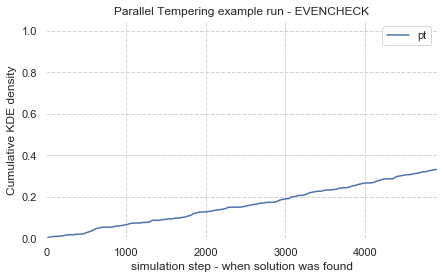

In [11]:
plot_hist_line(df_evencheck_pt_example, 
               schemes=['pt'], 
               column='iteration', 
               save_path=CHARTS_MAIN_PATH, 
               title='Parallel Tempering example run - EVENCHECK',
               ylabel='Cumulative KDE density',
               xlabel='simulation step - when solution was found'
              )

## Solution goodness vs switch_step

In [12]:
switch_step_mns = calc_mns_series(df_evencheck_pt_diff_switch_step, groupby='switch_step')

In [13]:
switch_step_cr = calc_cr_series(df_evencheck_pt_diff_switch_step, groupby='switch_step')

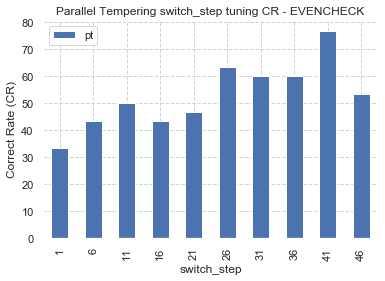

In [14]:
plot_bar(switch_step_cr, 
         schemes=['pt'], 
         column='cr',
         groupby='switch_step',
         save_path=CHARTS_MAIN_PATH, 
         title='Parallel Tempering switch_step tuning CR - EVENCHECK',
         ylabel='Correct Rate (CR)',
         xlabel='switch_step'
         )

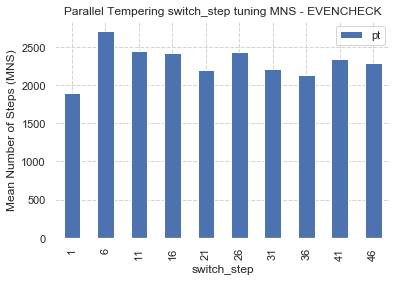

In [15]:
plot_bar(switch_step_mns, 
         schemes=['pt'], 
         column='mns',
         groupby='switch_step',
         save_path=CHARTS_MAIN_PATH, 
         title='Parallel Tempering switch_step tuning MNS - EVENCHECK',
         ylabel='Mean Number of Steps (MNS)',
         xlabel='switch_step'
         )

## Solution goodness vs Optimal Temperatures ratio

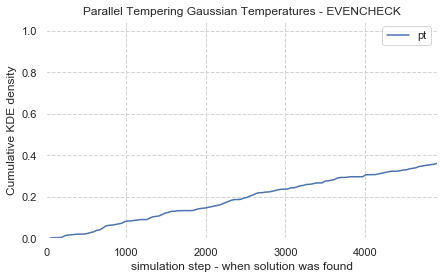

In [17]:
plot_hist_line(df_evencheck_pt_optimal_temp_calc_1, 
               schemes=['pt'], 
               column='iteration', 
               save_path=CHARTS_MAIN_PATH, 
               title='Parallel Tempering Gaussian Temperatures - EVENCHECK',
               ylabel='Cumulative KDE density',
               xlabel='simulation step - when solution was found'
              )

#### Comment

Using the technique from the paper on Parallel Tempering - the overall quality of the solution is not better. 

### Acceptance ratio

In [21]:
mean_acc_ratio = df_evencheck_pt_optimal_temp_calc_1.switch_ratio.mean()

Markdown(f"#### Mean switch raio: {mean_acc_ratio}")

#### Mean switch raio: 0.8096533333333333

#### Comment 

The switch ratio is to big for this example. It should be considered to review the parameter in the calculation of optimal temperatures.

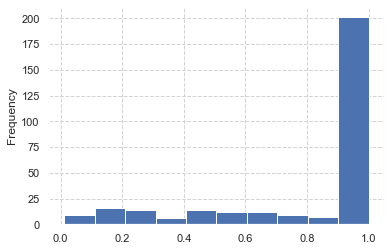

In [25]:
df_evencheck_pt_optimal_temp_calc_1.switch_ratio.plot.hist()
plt.grid(color='lightgray', linestyle='--', linewidth=1)

#### Comment

As we can see the acceptance ratio equals to 1 in 2/3 of the simulations. It should be considered as not desired behavior. Therefore the differences in the annealing_parameter between systems should be reconsidered.